In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
m = 0.8
step = 50

In [48]:
nrows = 3
ncols = int(np.ceil(nrows/m*(1.) + 3))

In [53]:
range(7)

[0, 1, 2, 3, 4, 5, 6]

In [49]:
x = 0
row1 = 0 + step, 0 + 2 * step, 0 + 3 * step

In [73]:
row1 = []
for col in range(ncols):
    row1.append(col * step)

In [74]:
xr = []
for row in range(nrows):
    offset = (row)/m # offset of starting point
    for col in range(ncols):
        xr.append(col * step + offset*step)

In [75]:
yr = np.repeat([0, step, 2*step], ncols)

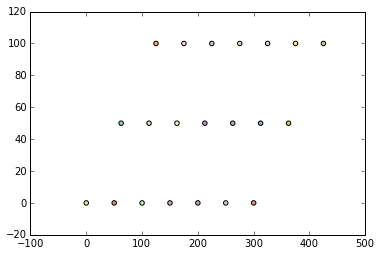

In [177]:
colours = np.arange(0, 1 , 1./len(xr))
np.random.shuffle(colours)
plt.scatter(xr, yr, c=colours, cmap='Set3', linewidths=1)

In [178]:
references = zip(xr, yr)

col_dict = dict(zip(references, colours))


xp = np.random.randint(0, (ncols+3)*step, 10000)
yp = np.random.randint(0, 2*step+2, 10000)
coords = zip(xp, yp)

In [179]:
def find_distance(coord, reference):
    """Determine distance between two coordinate tuples."""
    xc, yc = coord
    xr, yr = reference
    return np.sqrt((xr-xc)**2+(yr-yc)**2) # euclidean distance  

In [180]:
def find_nearest(coord, references):
    """Determine which reference coordinate tuples is closest to candidates"""
    # Find distance from each reference
    distances = {find_distance(coord, ref): ref for ref in references} # reverse dict
    closest = np.min(distances.keys()) 
    return distances[closest] # closest 

In [181]:
c = (2-ncols)*step# intercept of final line
valid = [(x,y) for (x,y) in coords if (y <= (m*x)) and (y >= (m*x+c))]

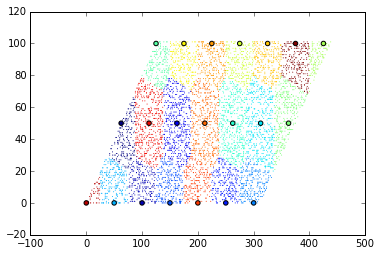

In [182]:
p_colours = [col_dict[find_nearest(coord, references)] for coord in valid]
    
xp, yp = np.array(valid).T
plt.scatter(xp, yp, s=1, linewidth=0, c=p_colours)
plt.scatter(xr, yr, c=colours)